# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sinasc = pd.read_csv('b1abb33c4f.csv')
sinasc = pd.DataFrame(sinasc)
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'APGAR5_info'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'APGAR5_info'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'APGAR5_info'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'APGAR5_info'] = 'asfixia grave'
sinasc.drop(columns=['APGAR5'], inplace = True)
sinasc = sinasc.rename(columns={'APGAR5_info':'APGAR5'})
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,normal
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [6]:
distribuicao_apgar = sinasc[['APGAR5','SEXO','GESTACAO', 'CONTADOR']]
distribuicao_apgar

,APGAR5,SEXO,GESTACAO,CONTADOR
0,normal,Masculino,37 a 41 semanas,1
1,normal,Feminino,37 a 41 semanas,2
2,normal,Feminino,37 a 41 semanas,3
3,normal,Feminino,37 a 41 semanas,4
4,normal,Feminino,37 a 41 semanas,5
...,...,...,...,...
27023,normal,Masculino,32 a 36 semanas,2767632
27024,normal,Masculino,37 a 41 semanas,2772678
27025,normal,Masculino,37 a 41 semanas,2776905
27026,normal,Masculino,32 a 36 semanas,2777105


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
selecao = distribuicao_apgar.groupby(['GESTACAO', 'APGAR5']).size().unstack(1)
selecao

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21.0,12.0,1.0,51.0
28 a 31 semanas,3.0,18.0,12.0,129.0
32 a 36 semanas,8.0,73.0,19.0,2134.0
37 a 41 semanas,33.0,196.0,28.0,22266.0
42 semanas e mais,1.0,6.0,1.0,690.0
Menos de 22 semanas,2.0,1.0,NaN,4.0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:

selecao
selecao['Total'] = selecao.sum(axis=1)


selecao['asfixia grave %'] = selecao['asfixia grave']/selecao['Total']*100
selecao['asfixia leve %'] = selecao['asfixia leve']/selecao['Total']*100
selecao['asfixia moderada %'] = selecao['asfixia moderada']/selecao['Total']*100
selecao['normal %'] = selecao['normal']/selecao['Total']*100

selecao

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal,Total,asfixia grave %,asfixia leve %,asfixia moderada %,normal %
GESTACAO,,,,,,,,,
22 a 27 semanas,21.0,12.0,1.0,51.0,85.0,24.705882,14.117647,1.176471,60.000000
28 a 31 semanas,3.0,18.0,12.0,129.0,162.0,1.851852,11.111111,7.407407,79.629630
32 a 36 semanas,8.0,73.0,19.0,2134.0,2234.0,0.358102,3.267681,0.850492,95.523724
37 a 41 semanas,33.0,196.0,28.0,22266.0,22523.0,0.146517,0.870222,0.124317,98.858944
42 semanas e mais,1.0,6.0,1.0,690.0,698.0,0.143266,0.859599,0.143266,98.853868
Menos de 22 semanas,2.0,1.0,NaN,4.0,7.0,28.571429,14.285714,NaN,57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

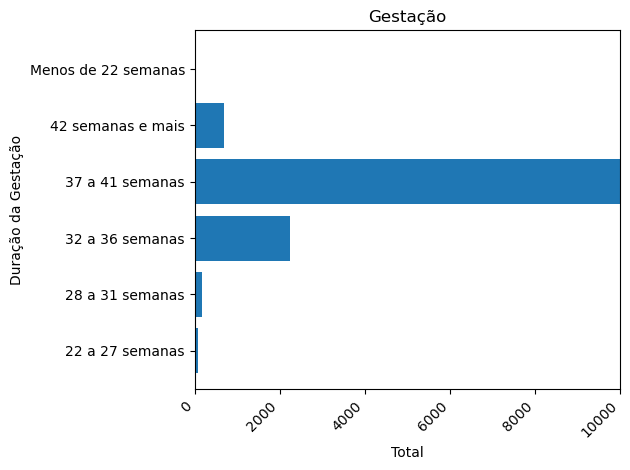

In [9]:

x = selecao.index
y = selecao['Total']


plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots()
ax.barh(x,y)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0,10000],xlabel='Total', ylabel='Duração da Gestação',
       title='Gestação')

plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [13]:
apgar5 = pd.DataFrame(sinasc['APGAR5'].value_counts())
apgar5

APGAR5_COD = sinasc['APGAR5']
sinasc['APGAR5_COD'] = APGAR5_COD
correlacao = sinasc[['APGAR5_COD','PESO']]
correlacao['APGAR5_COD'] = correlacao['APGAR5_COD'].map({'normal':0,
                                                         'asfixia leve':1,
                                                         'asfixia grave':2,
                                                        'asfixia moderada':3})



print(correlacao.corr(method ='pearson'))

print(correlacao.corr(method ='kendall'))

print(correlacao.corr())

correlacao.value_counts()

            APGAR5_COD      PESO
APGAR5_COD    1.000000 -0.155412
PESO         -0.155412  1.000000
            APGAR5_COD      PESO
APGAR5_COD    1.000000 -0.059199
PESO         -0.059199  1.000000
            APGAR5_COD      PESO
APGAR5_COD    1.000000 -0.155412
PESO         -0.155412  1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_3892\4235541672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlacao['APGAR5_COD'] = correlacao['APGAR5_COD'].map({'normal':0,


APGAR5_COD  PESO
0.0         3300    182
            3500    174
            3250    169
            3000    166
            3350    165
                   ... 
            3303      1
            3306      1
            3318      1
            3322      1
3.0         4075      1
Length: 1796, dtype: int64